# Projeto 1-ciência dos dados
## Laura Perim 



**Pergunta a ser respondida:**


A entrada dos países membros da organização Mercosul, fundada em 1991, fortaleceu a economia desses países realmente?






 **Explicação da hipótes**
 
  A entrada dos países na organização contribui para um incremento na economia e investimentos.
  
  sites de referência: https://economia.ig.com.br/2016-07-01/mercosul-paises-objetivos-economia.html
                        http://www.mercosul.gov.br/saiba-mais-sobre-o-mercosul 
                     https://www.researchgate.net/profile/Luiz_Federizzi/publication/238096616_A_SOJA_COMO_FATOR_DE_COMPETITIVIDADE_NO_MERCOSUL_HISTORICO_PRODUCAO_E_PERSPECTIVAS_FUTURAS/links/00b49532ac503da3aa000000.pdf


 **Mecanismo**
 
 Por meio de diferentes interpretações dos dados populacionais com diferentes gráficos, a pergunta será analisada e desenvolvida. Os países selecionados foram separados para uma melhor observação  em três grupos, países membros da Mercosul, associados a organização, e os e países não membros, porém  com uma economia relativamente alta. A escolha desses anos para análise se deu, pois com eles conseguimos comparar as situções dos países em diferentes blocos, logo quando entraram na organização, e uma outra  mais atual, assim comparando a evolução econômica. 

**Referência dos dados dos países**


https://data.worldbank.org/indicator/TX.VAL.TECH.MF.ZS

https://data.worldbank.org/indicator/NY.GDP.DEFL.KD.ZG

https://data.worldbank.org/indicator/NE.GDI.TOTL.ZS

 **Importação**
 
 Importação das bibliotecas necessárias para a execução dos códigos ao londo do trabalho.

In [174]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

 **Filtrando a tabela**
 
 Foi realizado, a importação dos dados e a filtragem de células deles.

In [185]:
a=pd.read_excel('investments_percent_of_gdp.xlsx').set_index("country")
b=pd.read_excel('high_technology_exports_percent_of_manufactured_exports.xlsx').set_index("country")
c=pd.read_excel('inflation_annual_percent.xlsx').set_index("country")
linhas=[ "Brazil","Argentina","Paraguay","Venezuela","Uruguay","Chile","Peru","Spain","United States","United Kingdom","Canada","Bolivia","Colombia","Ecuador"]
colunas=[2016,1996]

a_2016 = a.loc[linhas,colunas]
b_2016 = b.loc[linhas,colunas]
c_2016 = c.loc[linhas,colunas]

a_2016.rename(columns={2016: 'GDP_2016'}, inplace=True)
b_2016.rename(columns={2016: 'high_tec_2016'}, inplace=True)
c_2016.rename(columns={2016: 'inflation_2016'}, inplace=True)
a_2016.rename(columns={1996: 'GDP_1996'}, inplace=True)
b_2016.rename(columns={1996: 'high_tec_1996'}, inplace=True)
c_2016.rename(columns={1996: 'inflation_1996'}, inplace=True)





data = pd.merge(a_2016, b_2016, left_index=True, right_index=True)
data = pd.merge(data, c_2016, left_index=True, right_index=True)
data


,GDP_2016,GDP_1996,high_tec_2016,high_tec_1996,inflation_2016,inflation_1996
country,,,,,,
Brazil,15.4,17.3,13.40,6.21,8.140,18.5000
Argentina,17.0,18.1,8.79,5.59,40.100,-0.0524
Paraguay,18.0,22.1,7.25,1.27,5.280,11.4000
Venezuela,NaN,16.6,NaN,2.52,NaN,116.0000
Uruguay,17.8,15.2,9.71,2.66,7.350,26.4000
Chile,22.2,27.8,6.95,3.66,4.730,3.3700
Peru,22.1,22.6,4.22,5.82,2.880,9.6900
Spain,20.5,22.1,6.98,7.60,0.283,3.4700
United States,19.7,21.6,20.00,30.80,1.280,1.8300


 **Adicionando outra variável**
 
 Foi adicionado, a variável para saber quais países fazem  parte da mercosul.

In [186]:
l1=[ "Brazil","Argentina","Paraguay","Venezuela","Uruguay"]
l2=["Spain","United States","United Kingdom","Canada"]
l3=["Chile","Peru","Colombia","Ecuador","Bolivia"]

data.loc[l1,"mercosul"]= "membro"
data.loc[l2,"mercosul"]= "nao"
data.loc[l3,"mercosul"]= "associado"



In [188]:
data

,GDP_2016,GDP_1996,high_tec_2016,high_tec_1996,inflation_2016,inflation_1996,mercosul
country,,,,,,,
Brazil,15.4,17.3,13.40,6.21,8.140,18.5000,membro
Argentina,17.0,18.1,8.79,5.59,40.100,-0.0524,membro
Paraguay,18.0,22.1,7.25,1.27,5.280,11.4000,membro
Venezuela,NaN,16.6,NaN,2.52,NaN,116.0000,membro
Uruguay,17.8,15.2,9.71,2.66,7.350,26.4000,membro
Chile,22.2,27.8,6.95,3.66,4.730,3.3700,associado
Peru,22.1,22.6,4.22,5.82,2.880,9.6900,associado
Spain,20.5,22.1,6.98,7.60,0.283,3.4700,nao
United States,19.7,21.6,20.00,30.80,1.280,1.8300,nao


**Mèdia e desvio padrão**

Análise da média e do desvio padrão de cada variável para os países que são relativamente membros da organização

In [189]:
for e in l1:
    print("Desvio Padrão: {0}".format(data.std()))
    print("Mediana: {0}".format(data.median()))
    

Desvio Padrão: GDP_2016           3.122499
GDP_1996           3.376299
high_tec_2016      5.414941
high_tec_1996     11.882212
inflation_2016    10.655357
inflation_1996    29.776215
dtype: float64
Mediana: GDP_2016          20.500
GDP_1996          18.900
high_tec_2016      8.790
high_tec_1996      6.015
inflation_2016     2.880
inflation_1996     6.885
dtype: float64
Desvio Padrão: GDP_2016           3.122499
GDP_1996           3.376299
high_tec_2016      5.414941
high_tec_1996     11.882212
inflation_2016    10.655357
inflation_1996    29.776215
dtype: float64
Mediana: GDP_2016          20.500
GDP_1996          18.900
high_tec_2016      8.790
high_tec_1996      6.015
inflation_2016     2.880
inflation_1996     6.885
dtype: float64
Desvio Padrão: GDP_2016           3.122499
GDP_1996           3.376299
high_tec_2016      5.414941
high_tec_1996     11.882212
inflation_2016    10.655357
inflation_1996    29.776215
dtype: float64
Mediana: GDP_2016          20.500
GDP_1996          18.900

In [ ]:
for e in l1:
    print("Desvio Padrão: {0}".format(data.std()))
    print("Mediana: {0}".format(data.median()))

**Gráfico do tipo 1**

Os gráficos representam uma análise da situação em que os países se encontravam nos seguintes anos em questão, diferenciando e comparando os diferentes grupos analisados.

Text(0, 0.5, 'GDP_2016')

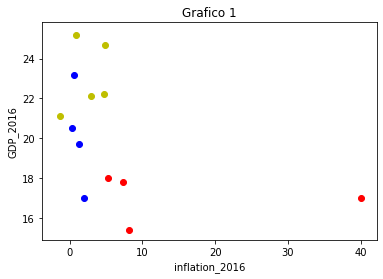

In [106]:
plt.scatter(data.loc[data.mercosul=="membro","inflation_2016"], data.loc[data.mercosul=="membro","GDP_2016"], color="r")
plt.scatter(data.loc[data.mercosul=="nao","inflation_2016"], data.loc[data.mercosul=="nao","GDP_2016"], color="b")
plt.scatter(data.loc[data.mercosul=="associado","inflation_2016"], data.loc[data.mercosul=="associado","GDP_2016"], color="y")
plt.title("Grafico 1")
plt.xlabel("inflation_2016")
plt.ylabel("GDP_2016")

Text(0, 0.5, 'GDP_1996')

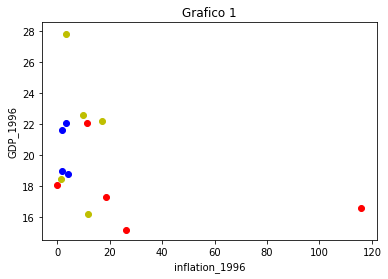

In [107]:
#data.plot.scatter("inflation_2016","GDP_2016")
plt.scatter(data.loc[data.mercosul=="membro","inflation_1996"], data.loc[data.mercosul=="membro","GDP_1996"], color="r")
plt.scatter(data.loc[data.mercosul=="nao","inflation_1996"], data.loc[data.mercosul=="nao","GDP_1996"], color="b")
plt.scatter(data.loc[data.mercosul=="associado","inflation_1996"], data.loc[data.mercosul=="associado","GDP_1996"], color="y")
plt.title("Grafico 1")
plt.xlabel("inflation_1996")
plt.ylabel("GDP_1996")


Text(0, 0.5, 'GDP_2016')

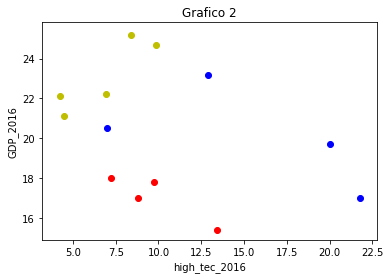

In [111]:
#data.plot.scatter("inflation_1996","GDP_1996")
plt.scatter(data.loc[data.mercosul=="membro","high_tec_2016"], data.loc[data.mercosul=="membro","GDP_2016"], color="r")
plt.scatter(data.loc[data.mercosul=="nao","high_tec_2016"], data.loc[data.mercosul=="nao","GDP_2016"], color="b")
plt.scatter(data.loc[data.mercosul=="associado","high_tec_2016"], data.loc[data.mercosul=="associado","GDP_2016"], color="y")
plt.title("Grafico 2")
plt.xlabel("high_tec_2016")
plt.ylabel("GDP_2016")



Text(0, 0.5, 'GDP_1996')

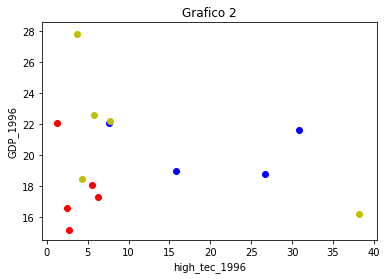

In [109]:
#data.plot.scatter("high tec_2016","GDP_2016")
plt.scatter(data.loc[data.mercosul=="membro","high_tec_1996"], data.loc[data.mercosul=="membro","GDP_1996"], color="r")
plt.scatter(data.loc[data.mercosul=="nao","high_tec_1996"], data.loc[data.mercosul=="nao","GDP_1996"], color="b")
plt.scatter(data.loc[data.mercosul=="associado","high_tec_1996"], data.loc[data.mercosul=="associado","GDP_1996"], color="y")
plt.title("Grafico 2")
plt.xlabel("high_tec_1996")
plt.ylabel("GDP_1996")





Text(0, 0.5, 'inflation_2016')

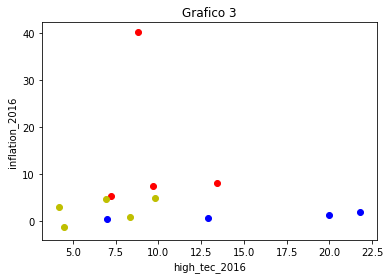

In [113]:
#data.plot.scatter("high tec_1996","GDP_1996")
plt.scatter(data.loc[data.mercosul=="membro","high_tec_2016"], data.loc[data.mercosul=="membro","inflation_2016"], color="r")
plt.scatter(data.loc[data.mercosul=="nao","high_tec_2016"], data.loc[data.mercosul=="nao","inflation_2016"], color="b")
plt.scatter(data.loc[data.mercosul=="associado","high_tec_2016"], data.loc[data.mercosul=="associado","inflation_2016"], color="y")
plt.title("Grafico 3")
plt.xlabel("high_tec_2016")
plt.ylabel("inflation_2016")


Text(0, 0.5, 'inflation_1996')

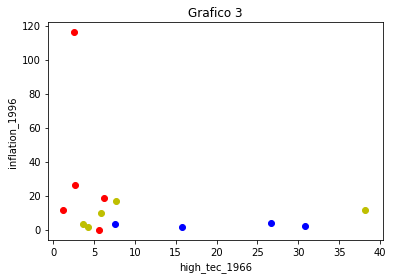

In [114]:
plt.scatter(data.loc[data.mercosul=="membro","high_tec_1996"], data.loc[data.mercosul=="membro","inflation_1996"], color="r")
plt.scatter(data.loc[data.mercosul=="nao","high_tec_1996"], data.loc[data.mercosul=="nao","inflation_1996"], color="b")
plt.scatter(data.loc[data.mercosul=="associado","high_tec_1996"], data.loc[data.mercosul=="associado","inflation_1996"], color="y")
plt.title("Grafico 3")
plt.xlabel("high_tec_1966")
plt.ylabel("inflation_1996")

**Gráfico do tipo 2**

Esse gráfico  possui como objetivo comparar as duas diferentes datas tratadas no trabalho, e como os diferentes grupos analisados se comportam com elas.



Text(0, 0.5, 'high_tec_1996')

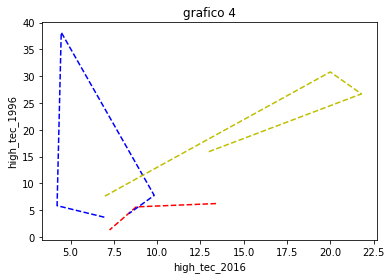

In [154]:
plt.plot(data.loc[data.mercosul=="membro","high_tec_2016"], data.loc[data.mercosul=="membro","high_tec_1996"], color="r",linestyle="--")
plt.plot(data.loc[data.mercosul=="associado","high_tec_2016"], data.loc[data.mercosul=="associado","high_tec_1996"], color="b",linestyle="--")
plt.plot(data.loc[data.mercosul=="nao","high_tec_2016"], data.loc[data.mercosul=="nao","high_tec_1996"], color="y",linestyle="--")


plt.title("grafico 4")
plt.xlabel("high_tec_2016")
plt.ylabel("high_tec_1996")


Text(0, 0.5, 'inflation_1996')

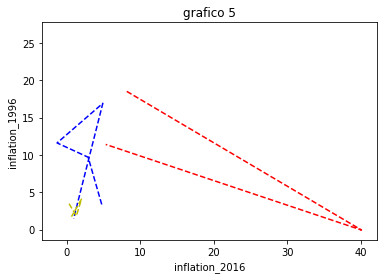

In [151]:
#data.plot.box()
plt.plot(data.loc[data.mercosul=="membro","inflation_2016"], data.loc[data.mercosul=="membro","inflation_1996"], color="r", linestyle="--")
plt.plot(data.loc[data.mercosul=="associado","inflation_2016"], data.loc[data.mercosul=="associado","inflation_1996"], color="b",linestyle="--")
plt.plot(data.loc[data.mercosul=="nao","inflation_2016"], data.loc[data.mercosul=="nao","inflation_1996"], color="y",linestyle="--")



plt.title("grafico 5")
plt.xlabel("inflation_2016")
plt.ylabel("inflation_1996")


Text(0, 0.5, 'GDP_2016')

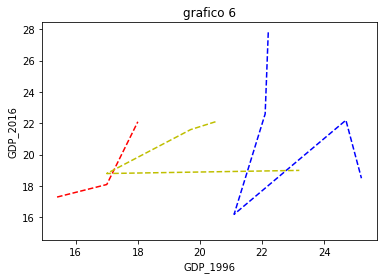

In [191]:
plt.plot(data.loc[data.mercosul=="membro","GDP_2016"], data.loc[data.mercosul=="membro","GDP_1996"], color="r",linestyle="--")
plt.plot(data.loc[data.mercosul=="associado","GDP_2016"], data.loc[data.mercosul=="associado","GDP_1996"], color="b",linestyle="--")
plt.plot(data.loc[data.mercosul=="nao","GDP_2016"], data.loc[data.mercosul=="nao","GDP_1996"], color="y",linestyle="--")


plt.title("grafico 6")
plt.xlabel("GDP_1996")
plt.ylabel("GDP_2016")

 **Adicionando outra variável**
 
 Esses gráficos de barra fornecem uma maior visualização da diferença dos dados em cada data.
    

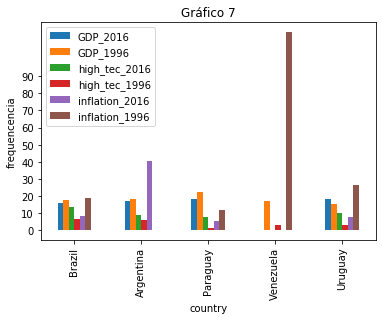

In [217]:
X = data['GDP_2016']
valores = data.loc[data.mercosul=="membro"]
valores.plot.bar()
plt.yticks(range(0,100,10))
plt.title("Gráfico 7")
plt.ylabel("frequencencia")
plt.show()

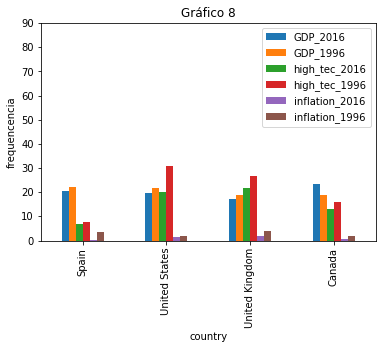

In [219]:
X = data['GDP_2016']
valores = data.loc[data.mercosul=="nao"]
valores.plot.bar()
plt.yticks(range(0,100,10))
plt.title("Gráfico 8")
plt.ylabel("frequencencia")
plt.show()


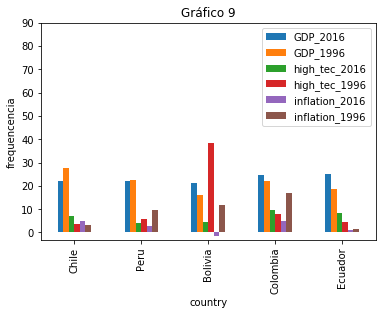

In [220]:
X = data['GDP_2016']
valores = data.loc[data.mercosul=="associado"]
valores.plot.bar()
plt.yticks(range(0,100,10))
plt.title("Gráfico 9")
plt.ylabel("frequencencia")
plt.show()
   